In [100]:
!pip install -r requirements.txt

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("mpg.csv")
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
140,14.0,8,304.0,150,4257,15.5,74,1,amc matador (sw)
385,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
246,32.8,4,78.0,52,1985,19.4,78,3,mazda glc deluxe
281,19.8,6,200.0,85,2990,18.2,79,1,mercury zephyr 6
24,21.0,6,199.0,90,2648,15.0,70,1,amc gremlin


<Axes: >

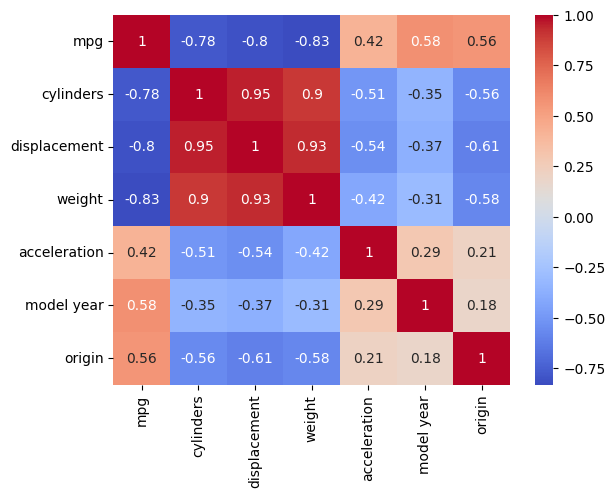

In [103]:
sns.heatmap(df.corr(numeric_only=True),
            annot=True, cmap="coolwarm")

<Axes: xlabel='mpg'>

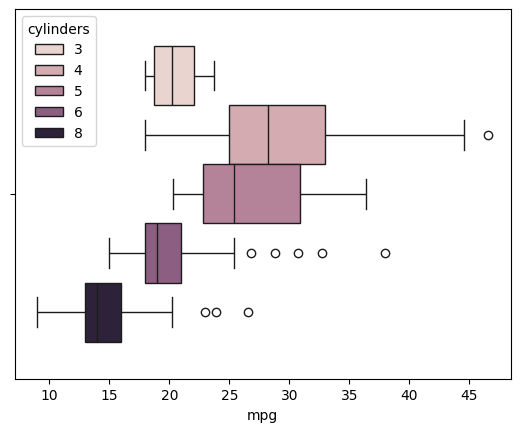

In [104]:
sns.boxplot(df, x="mpg", hue="cylinders")

In [105]:
df = df.replace('?', pd.NA).dropna()

df['horsepower'] = df['horsepower'].astype(int)

In [106]:
y = df['mpg']
X = df.drop(columns=['mpg', 'car name', 'origin'])

In [107]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state= 42
)

In [109]:
from sklearn.ensemble import RandomForestRegressor

consumo = RandomForestRegressor()

consumo.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
carro = X_test.sample(1)
carro

,cylinders,displacement,horsepower,weight,acceleration,model year
179,4,121.0,98,2945,14.5,75


In [111]:
consumo.predict(carro)

array([21.38])

In [112]:
y_test.sample(1, random_state=42)

134    16.0
Name: mpg, dtype: float64

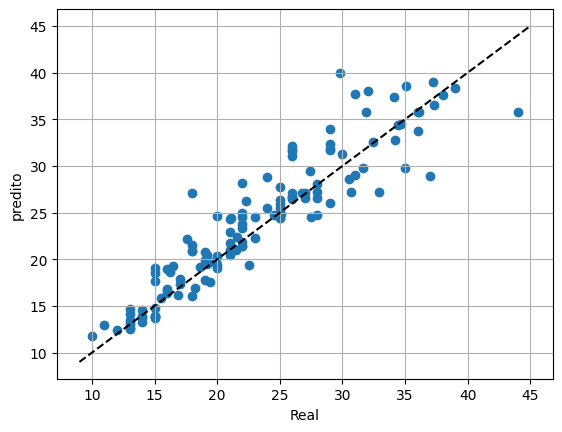

In [113]:
plt.scatter(y_test, consumo.predict(X_test))
plt.plot([9, 45], [9, 45], ls="--", c="k")
plt.xlabel("Real")
plt.ylabel("predito")
plt.grid()

In [115]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, consumo.predict(X_test), squared=False)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.874786307777432